<a href="https://colab.research.google.com/github/IngCarlosCogua/maching_learn_ch/blob/main/Regresiones/RegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nota: el escalonamieto de datos no se necesita en la regresion lineal simple

tipos de variables:

Catgeoricas:
-nominales:"mujer, hombre" / no tienen orden
-ordinales: "pequeño, mediano, grane, a,b,c" / tienen orden

Numericas:
-Discretas : 1,2,3 numeros enteros
- Continuas: edad, altura, peso 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


La regresion lineal simple es el uso de una variable dependeinte y una independiente para la prediccion 

In [ ]:
#importacion de librerias
import numpy as np #calculos matematicos cientificos
import matplotlib.pyplot as plt #sublinreria para representacio  grafica
import pandas as pd # libreria para carga y manipulacion de datos
dataset = pd.read_csv('/content/drive/MyDrive/Analitica_Programadorch/Archivoscsv/Salary_Data.csv')
dataset.info() #informacion de filas y columnas del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
#X es la variable independiente predictora  y Y es la variable dependiente a predecir

X = dataset.iloc[:,:-1].values #iloc sirve para localizar filas i columnas por posicion,[:,:-1] toma todas las filas y todas la columnas exepto la ultima en una array
Y = dataset.iloc[:,1].values # toma todas la filas pero solo de la ultima columna

In [ ]:
X # array años de experiencia

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
Y #array sueldo

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# **Division de dataset Para Entrenamiento y Testeo**

del 100% de  los datos tomamos el 80 y 70 % para entrenan y el restante lo dejamos para evaluar su efectividad

In [ ]:
from sklearn.model_selection import train_test_split # funcion que nos permite dividir el dataset original

Dividiendo las variables

In [ ]:
#variables de entrenaiento y testeo   division de dataset , definicion de tamaño del esteo, como es una muestra de 30 valores solo por este caso ponemos 1 de cada 3 valores sera para testeo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 1/3, random_state= 0 ) #80% de los datos o filas son para entrenaiento y 20 para testeo

Variables de testo y entrenamiento separadas 1/3 de informacion

In [ ]:
X_train

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [ ]:
Y_train

array([ 56642.,  66029.,  64445.,  61111., 113812.,  91738.,  46205.,
       121872.,  60150.,  39891.,  81363.,  93940.,  57189.,  54445.,
       105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [ ]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [ ]:
Y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

# **Entrenamiento del modelo para hacer regresion lineal simple**

In [ ]:
from sklearn.linear_model import LinearRegression  # importando libreria para realizar regresiones lineales
#creamos un objeto 
regresion = LinearRegression()
#entrenamiento de variable x variables predictoras y Y variable a predecir , los 2 vectores deben tene rel mismo numero de filas
regresion.fit(X_train, Y_train) #fit realiza el entrenamiento 
#HASTA ESTE PUNTO EL ALGORITMO YA APRENDIENDO A HACER LA REGRECION CON LOS DATOS DE TRAIN

LinearRegression()

Prediciendo el conjunto de testeo

In [ ]:
Y_pred = regresion.predict(X_test) #realizando la prediccion en base a ala regresion realizada con las variables independientes

**Comparando los datos de la prediccion con los reales**

In [ ]:
Y_pred #visualizando la prediccion

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [ ]:
Y_test # datos reales


array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

#Visualizacion de los resultados del entrenamiento

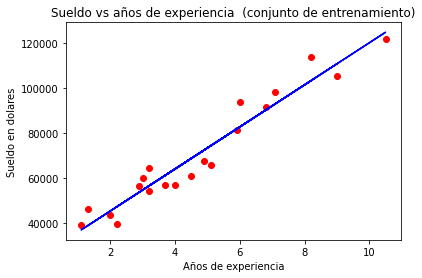

In [ ]:
plt.scatter(X_train,Y_train, color ="red" ) #valores para predecir
plt.plot(X_train, regresion.predict(X_train), color= "blue") # Recta de regresion
plt.title("Sueldo vs años de experiencia  (conjunto de entrenamiento)")
plt.xlabel("Años de experiencia")
plt.ylabel("Sueldo en dolares")
plt.show()
# la linea azul es la prediccion estimada para el pago de sueldos segun años de experiencia cada punto es un trabajador

#Visualizacion de los resultados de testeo

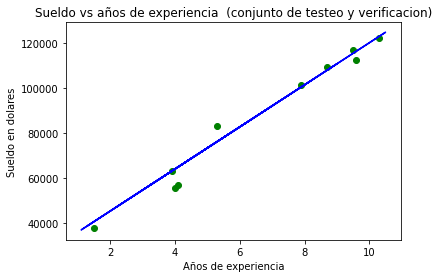

In [ ]:
plt.scatter(X_test,Y_test, color ="green" ) #valores para predecir
plt.plot(X_train, regresion.predict(X_train), color= "blue") # Recta de regresion se debe conservar en este grafico la recta es la misma
plt.title("Sueldo vs años de experiencia  (conjunto de testeo y verificacion)")
plt.xlabel("Años de experiencia")
plt.ylabel("Sueldo en dolares")
plt.show()
# si la linea azul esta acertada y cerca a la muestra de testing es porque el modelo esta bien entrenado